# 1 Carga de datos

In [1]:
import pandas as pd

In [39]:
df = pd.read_csv('/home/clisueno/output/unificado_psg_2023_2024.csv', dtype=str)

# 2 Asignación de tipos

## 2.1 Declaración de tipos

In [63]:
variables_str = ['nombre_paciente','id_paciente','md_solicita','eps_paciente','gravedad_iah','fuente']
variables_int = ['edad_paciente','peso_paciente','talla_paciente','cuello_paciente','perimetro_abdominal','escala_epworth']
variables_float = ['imc_paciente','eficiencia_sueno','latencia_total','latencia_rem','sueno_profundo','indice_microalertamientos','iah','duracion_prom_ah','so2_prom_vigilia','so2_prom_sueno_nrem','so2_prom_sueno_rem','s02_minima_ah','ido','tiempo_bajo_90so2','t90','iac','iao','iam','ih']
variables_datetime = ['fecha_proced']

## 2.2 Definición de funciones

In [64]:
import pandas as pd
from datetime import datetime
import numpy as np
import warnings

# Variables DATETIME ***********************************

def validar_transformar_datetime(df, variables):
    """
    Valida y transforma columnas de un DataFrame a datetime, reportando los resultados.

    Args:
        df (pd.DataFrame): El DataFrame a procesar.
        variables (list): Lista de nombres de columnas a transformar.

    Returns:
        dict: Diccionario con los resultados de la validación y transformación.
    """
    # Inicializar listas de resultados
    variables_no_encontradas = []
    variables_transformadas = []
    variables_no_transformadas = []
    variables_con_warnings = []

    fecha_comodin = "1801-01-01"

    # Lista de formatos permitidos
    formatos = ["%Y-%m-%d %H:%M:%S", "%m/%d/%Y"]

    def convertir_fecha(fecha_str):
        """Intenta convertir un valor a datetime utilizando varios formatos."""
        for formato in formatos:
            try:
                return datetime.strptime(fecha_str, formato)
            except ValueError:
                continue
        # Retorna la fecha comodín si no coincide con ningún formato
        return datetime.strptime(fecha_comodin, "%Y-%m-%d")

    for variable in variables:
        if variable not in df.columns:
            variables_no_encontradas.append(variable)
        else:
            try:
                with warnings.catch_warnings(record=True) as w:
                    warnings.simplefilter("always", UserWarning)

                    # Aplicar la conversión personalizada
                    df[variable] = df[variable].apply(lambda x: convertir_fecha(str(x).strip()))

                    # Verificar advertencias
                    if len(w) > 0:
                        variables_con_warnings.append(variable)

                    # Identificar si hubo valores no transformados
                    if df[variable].isnull().any():
                        variables_no_transformadas.append(variable)
                    else:
                        variables_transformadas.append(variable)

            except Exception as e:
                variables_no_transformadas.append(variable)

    # Generar el reporte
    print("\n************ Resultado de la transformación **************\n")
    print(f"{len(variables_no_encontradas)} Variables no encontradas: {variables_no_encontradas}")
    print(f"{len(variables_no_transformadas)} Variables no transformadas: {variables_no_transformadas}")
    print(f"{len(variables_con_warnings)} Variables transformadas con warnings: {variables_con_warnings}")
    print(f"{len(variables_transformadas)} Variables transformadas exitosamente: {variables_transformadas}")


# Validación y transformación a INTEGER *****************************

def validar_transformar_int(df, variables):
    """
    Valida y transforma columnas en un DataFrame a enteros, reemplazando valores no válidos con un valor predeterminado (-9999).

    Args:
        df (pd.DataFrame): DataFrame a validar y transformar.
        variables (list): Lista de nombres de las columnas a validar y transformar.

    Returns:
        dict: Diccionario con las listas de variables no encontradas, transformadas exitosamente, no transformadas y transformadas con warnings.
    """
    # Inicializar listas de resultados
    variables_no_encontradas = []
    variables_transformadas = []
    variables_no_transformadas = []
    variables_con_warnings = []

    # Valor predeterminado para valores no válidos
    valor_comodin = -9999

    for var in variables:
        if var not in df.columns:
            variables_no_encontradas.append(var)
            print(f"La columna '{var}' no se encuentra en el DataFrame.")
        else:
            try:
                with warnings.catch_warnings(record=True) as w:
                    warnings.simplefilter("always", UserWarning)

                    # Transformar a numérico, valores no válidos a -9999, y convertir a int
                    df[var] = pd.to_numeric(df[var], errors='coerce').fillna(valor_comodin).astype(int)

                    if len(w) > 0:  # Capturar advertencias
                        variables_con_warnings.append(var)

                    variables_transformadas.append(var)
            except Exception as e:
                variables_no_transformadas.append(var)
                print(f"Error al transformar la columna '{var}' a enteros: {e}")

    print("\n************ Resultado de la transformación **************\n")
    print(f"{len(variables_no_encontradas)} Variables no encontradas: {variables_no_encontradas}")
    print(f"{len(variables_no_transformadas)} Variables no transformadas: {variables_no_transformadas}")
    print(f"{len(variables_con_warnings)} Variables transformadas con warnings: {variables_con_warnings}")
    print(f"{len(variables_transformadas)} Variables transformadas exitosamente: {variables_transformadas}")


# Validación y transformación a FLOAT ************************************************

def validar_transformar_float(df, variables):
    """
    Valida y transforma columnas en un DataFrame a tipo float, reemplazando valores no válidos con un valor predeterminado (-9999.0).

    Args:
        df (pd.DataFrame): DataFrame a validar y transformar.
        variables (list): Lista de nombres de las columnas a validar y transformar.

    Returns:
        dict: Diccionario con las listas de variables no encontradas, transformadas exitosamente, no transformadas y transformadas con warnings.
    """
    # Inicializar listas de resultados
    variables_no_encontradas = []
    variables_transformadas = []
    variables_no_transformadas = []
    variables_con_warnings = []

    # Valor predeterminado para valores no válidos
    valor_comodin = -9999.0

    for var in variables:
        if var not in df.columns:
            variables_no_encontradas.append(var)
            print(f"La columna '{var}' no se encuentra en el DataFrame.")
        else:
            try:
                with warnings.catch_warnings(record=True) as w:
                    warnings.simplefilter("always", UserWarning)

                    # Transformar a numérico, valores no válidos a -9999.0, y convertir a float
                    df[var] = pd.to_numeric(df[var], errors='coerce').fillna(valor_comodin).astype(float)

                    if len(w) > 0:  # Capturar advertencias
                        variables_con_warnings.append(var)

                    variables_transformadas.append(var)

            except Exception as e:
                variables_no_transformadas.append(var)
                print(f"Error al transformar la columna '{var}' a flotante: {e}")

    print("\n************ Resultado de la transformación **************\n")
    print(f"{len(variables_no_encontradas)} Variables no encontradas: {variables_no_encontradas}")
    print(f"{len(variables_no_transformadas)} Variables no transformadas: {variables_no_transformadas}")
    print(f"{len(variables_con_warnings)} Variables transformadas con warnings: {variables_con_warnings}")
    print(f"{len(variables_transformadas)} Variables transformadas exitosamente: {variables_transformadas}")


# Validación y transformación a STRING ****************************************

def validar_transformar_str(df, variables):
    """
    Valida y transforma columnas en un DataFrame a tipo str, reemplazando valores NaN por "Sin Dato".

    Args:
        df (pd.DataFrame): DataFrame a validar y transformar.
        variables (list): Lista de nombres de las columnas a validar y transformar.

    Returns:
        dict: Diccionario con las listas de variables no encontradas, transformadas exitosamente, no transformadas y transformadas con warnings.
    """
    # Inicializar listas de resultados
    variables_no_encontradas = []
    variables_transformadas = []
    variables_no_transformadas = []
    variables_con_warnings = []

    # Valor predeterminado para valores NaN
    valor_comodin = "Sin Dato"

    for var in variables:
        if var not in df.columns:
            variables_no_encontradas.append(var)
            print(f"La columna '{var}' no se encuentra en el DataFrame.")
        else:
            try:
                with warnings.catch_warnings(record=True) as w:
                    warnings.simplefilter("always", UserWarning)

                    # Reemplazar NaN antes de convertir a str
                    df[var] = df[var].fillna(valor_comodin).astype(str)

                    if len(w) > 0:  # Capturar advertencias
                        variables_con_warnings.append(var)

                    variables_transformadas.append(var)

            except Exception as e:
                variables_no_transformadas.append(var)
                print(f"Error al transformar la columna '{var}' a cadena: {e}")

    print("\n************ Resultado de la transformación **************\n")
    print(f"{len(variables_no_encontradas)} Variables no encontradas: {variables_no_encontradas}")
    print(f"{len(variables_no_transformadas)} Variables no transformadas: {variables_no_transformadas}")
    print(f"{len(variables_con_warnings)} Variables transformadas con warnings: {variables_con_warnings}")
    print(f"{len(variables_transformadas)} Variables transformadas exitosamente: {variables_transformadas}")

## 2.3 Aplicación

In [83]:
validar_transformar_int(df,variables_int)


************ Resultado de la transformación **************

0 Variables no encontradas: []
0 Variables no transformadas: []
0 Variables transformadas con warnings: []
6 Variables transformadas exitosamente: ['edad_paciente', 'peso_paciente', 'talla_paciente', 'cuello_paciente', 'perimetro_abdominal', 'escala_epworth']


In [66]:
validar_transformar_float(df,variables_float)


************ Resultado de la transformación **************

0 Variables no encontradas: []
0 Variables no transformadas: []
0 Variables transformadas con warnings: []
19 Variables transformadas exitosamente: ['imc_paciente', 'eficiencia_sueno', 'latencia_total', 'latencia_rem', 'sueno_profundo', 'indice_microalertamientos', 'iah', 'duracion_prom_ah', 'so2_prom_vigilia', 'so2_prom_sueno_nrem', 'so2_prom_sueno_rem', 's02_minima_ah', 'ido', 'tiempo_bajo_90so2', 't90', 'iac', 'iao', 'iam', 'ih']


In [67]:
validar_transformar_datetime(df,variables_datetime)


************ Resultado de la transformación **************

0 Variables no encontradas: []
0 Variables no transformadas: []
0 Variables transformadas con warnings: []
1 Variables transformadas exitosamente: ['fecha_proced']


In [68]:
validar_transformar_str(df,variables_str)


************ Resultado de la transformación **************

0 Variables no encontradas: []
0 Variables no transformadas: []
0 Variables transformadas con warnings: []
6 Variables transformadas exitosamente: ['nombre_paciente', 'id_paciente', 'md_solicita', 'eps_paciente', 'gravedad_iah', 'fuente']


# 3 EDA

## 3.1 Sumamrize dataframe

### a. Definición

In [ ]:
from IPython.display import display, HTML

def format_large_numbers(value):
    """
    Formatea valores numéricos.
    - Valores mayores o menores a ±1E+06 se muestran en notación científica.
    - Otros valores se redondean a dos decimales.
    """
    if isinstance(value, (int, float)):
        if abs(value) > 1e6:
            return f"{value:.2E}"
        return f"{value:.2f}"
    return value  # Retorna el valor original si no es numérico


def summarize_statistics(df):
    """
    Extrae estadísticas básicas (mean, min, max) y las formatea,
    aplicando el cálculo solo a columnas numéricas.
    """
    # Seleccionamos solo las columnas numéricas
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Reemplazamos los valores -9999 por NaN en las columnas numéricas
    df_numeric = df_numeric.replace({-9999: np.nan})
    
    # Calculamos las estadísticas básicas sobre las columnas numéricas
    stats = df_numeric.describe().loc[['mean', 'min', 'max']]
    
    # Usamos apply con map para evitar FutureWarning de applymap
    formatted_stats = stats.apply(lambda col: col.map(format_large_numbers))
    
    return formatted_stats


def calculate_missing_values(df):
    """
    Calcula la cantidad y porcentaje de valores faltantes.
    """
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    return pd.DataFrame({
        'Missing Values': missing_values,
        'Missing %': missing_percentage.map(lambda x: f"{x:.2f}%")
    })


def calculate_unique_values(df):
    """
    Calcula la cantidad y porcentaje de valores únicos.
    """
    unique_values = df.nunique()
    unique_percentage = (unique_values / len(df)) * 100
    return pd.DataFrame({
        'Unique Values': unique_values,
        'Unique %': unique_percentage.map(lambda x: f"{x:.2f}%")
    })


def extract_sample_values(df):
    """
    Extrae un valor de muestra por columna, excluyendo NaN y ceros.
    """
    samples = []
    for col in df.columns:
        non_na_values = df[col].dropna()
        non_zero_values = non_na_values[non_na_values != 0]
        if not non_zero_values.empty:
            samples.append(non_zero_values.iloc[0])  # Primer valor válido
        else:
            samples.append("N/A")
    return samples


def calculate_category_frequencies(df):
    """
    Calcula la frecuencia de valores en columnas categóricas,
    ignorando variables que contienen 'fecha'.
    Limita a 10 categorías y agrupa las restantes en 'OTROS'.
    """
    frequencies = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            if 'fecha' not in col.lower():
                # Calcular frecuencias
                freq = df[col].value_counts()

                # Separar las 10 más frecuentes y agrupar el resto en "OTROS"
                top_10 = freq[:10]
                others_sum = freq[10:].sum()
                if others_sum > 0:
                    top_10 = pd.concat([top_10, pd.Series({'OTROS': others_sum})])

                # Formatear como cadena concatenada
                freq_str = '"{}"'.format(' | '.join([f"{k}: {v}" for k, v in top_10.items()]))

                frequencies.append(freq_str)
            else:
                frequencies.append("N/A")
        else:
            frequencies.append("N/A")
    return frequencies


def summarize_dataframe(df):
    """
    Genera un resumen detallado de un DataFrame.
    """
    variables = df.columns.tolist()
    summary_stats = summarize_statistics(df)
    data_types = df.dtypes
    missing_info = calculate_missing_values(df)
    unique_info = calculate_unique_values(df)
    sample_values = extract_sample_values(df)
    category_frequencies = calculate_category_frequencies(df)

    # Crear DataFrame resumen
    summary_df = pd.DataFrame({
        'Variable': variables,
        'Data Type': [data_types[col] for col in variables],
        'Count': [df[col].count() for col in variables],
        'Unique Values': [f"{unique_info.loc[col, 'Unique Values']} ({unique_info.loc[col, 'Unique %']})" for col in variables],
        'Category Frequencies': category_frequencies,
        'Missing Values': [f"{missing_info.loc[col, 'Missing Values']} ({missing_info.loc[col, 'Missing %']})" for col in variables],
        'Min': [summary_stats[col]['min'] if col in summary_stats.columns else "N/A" for col in variables],
        'Mean': [summary_stats[col]['mean'] if col in summary_stats.columns else "N/A" for col in variables],
        'Max': [summary_stats[col]['max'] if col in summary_stats.columns else "N/A" for col in variables],
        'Sample': sample_values
    })

    # Mostrar como HTML
    display(HTML(summary_df.to_html(index=False)))


### b. Aplicación

In [117]:
summarize_dataframe(df)

Variable,Data Type,Count,Unique Values,Category Frequencies,Missing Values,Min,Mean,Max,Sample
nombre_paciente,object,16960,16265 (95.90%),"""SOLANGEL ARENAS QUINTERO: 3 | RICARDO ALBERTO MOLINA GONZALEZ: 3 | LEIDY MARLENE GIRALDO ORDONEZ: 3 | JUANITA PINEDA BADILLO: 3 | VIRGINIA QUINONEZ MENDOZA: 3 | ALEXIS JOSE GUTIERREZ DELGADO: 3 | DIEGO ARMANDO ACEVEDO RUEDA: 3 | CARMEN ELISA CARDENAS FONTECHA: 3 | MARLENY GONZALEZ AGUILAR: 3 | EDUARDO SARMIENTO CIPAGAUTA: 3 | OTROS: 16930""",0 (0.00%),N/A,N/A,N/A,ABELARDO DURAN GIL
edad_paciente,int64,16960,101 (0.60%),N/A,0 (0.00%),0.00,52.66,354.00,70
id_paciente,object,16960,16206 (95.55%),"""Sin Dato: 15 | 21893440.0: 3 | 1096198937.0: 3 | 37886771.0: 3 | 51920403.0: 3 | 63361439.0: 3 | 63309616.0: 3 | 1098702486.0: 3 | 63361666.0: 3 | 1097151798.0: 3 | OTROS: 16918""",0 (0.00%),N/A,N/A,N/A,13827173.0
peso_paciente,int64,16960,176 (1.04%),N/A,0 (0.00%),3.00,77.86,8000.00,66
talla_paciente,int64,16960,153 (0.90%),N/A,0 (0.00%),1.00,159.88,1680.00,169
imc_paciente,float64,16960,1149 (6.77%),N/A,0 (0.00%),3.74,28.69,81.10,-9999.0
cuello_paciente,int64,16960,53 (0.31%),N/A,0 (0.00%),20.00,38.51,185.00,33
perimetro_abdominal,int64,16960,143 (0.84%),N/A,0 (0.00%),12.00,98.42,196.00,87
md_solicita,object,16960,8159 (48.11%),"""Dr. Federico Nino - Neumologo: 197 | Dra. Yaneth Jaimes - Neumologa: 150 | Dr. Federico Nino – Neumologo: 101 | Dra. Leslie Vargas - Neumologa: 100 | Dr. Gustavo Pizarro – Otorrinolaringologo: 76 | Dr. Gustavo Pizarro - Otorrinolaringologo: 68 | Dr. Jaime Barreto - Neumologo: 63 | Dr. Alain Sanchez – Neumologo Pediatra: 62 | Dra. Yaneth Jaimes – Neumologa: 59 | Dra. Yaneth Jaimes -Neumologa: 54 | OTROS: 16030""",0 (0.00%),N/A,N/A,N/A,Dra. Monica Ladino -Otorrinolaringologa
eps_paciente,object,16960,292 (1.72%),"""Sanitas EPS: 3821 | Nueva EPS: 3727 | Ecopetrol: 2179 | Sura EPS: 1063 | Avanzar: 542 | Colpatria: 419 | Sanitas: 318 | Suramericana: 317 | Colsanitas: 304 | Policia Nacional: 301 | OTROS: 3969""",0 (0.00%),N/A,N/A,N/A,Sura EPS


### ccc

In [121]:
df.replace(-9999, None, inplace=True)

In [122]:
df['edad_paciente'].min()

0

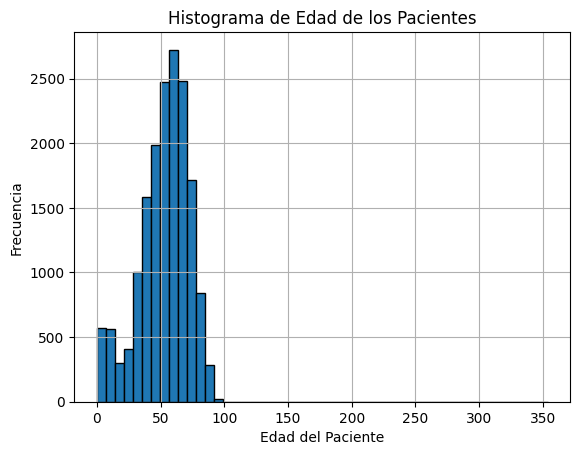

In [127]:
import matplotlib.pyplot as plt

df_edad_filtrado = df[df['edad_paciente'] < 1200]  # Filtrar edades válidas
df_edad_filtrado['edad_paciente'].hist(bins=50, edgecolor='black')
plt.xlabel('Edad del Paciente')
plt.ylabel('Frecuencia')
plt.title(f'Histograma de Edad de los Pacientes')
plt.show()
